In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
import numpy as np

from sklearn.cluster import KMeans

In [2]:
from ipywidgets import interact, fixed, widgets, interactive, interactive_output

In [5]:
def gen_blobs(n_samples, 
              cluster_std,
              ax=None):
    
    centers_neat = [(-10, 10), (0, -5), (10, 5)]
    
    X, y = datasets.make_blobs(n_samples   = n_samples,
                               centers     = centers_neat,
                               cluster_std = cluster_std,
                               random_state= 2)
    ax = ax or plt.gca()
    
    # plot samples
    ax.set_facecolor("lightgray")
    ax.grid()
    ax.scatter(X[:, 0],
               X[:, 1],
               c=y,
               s=50, 
               edgecolors='k',
               cmap='plasma')
    plt.show()
    return X, y

In [6]:
data = interactive(gen_blobs, 
                   n_samples=widgets.IntSlider(min=5, max=1000, step=5, value=10), 
                   cluster_std=widgets.FloatSlider(min=.1, max=10, step=.1, value=.5),
                   ax=fixed(None)
         )

display(data)

interactive(children=(IntSlider(value=10, description='n_samples', max=1000, min=5, step=5), FloatSlider(value…

In [5]:
print(data.kwargs)

{'n_samples': 10, 'cluster_std': 0.5, 'ax': None}


## dataset

In [7]:
X = data.result[0]
y = data.result[1]

In [8]:
from sklearn.metrics import pairwise_distances_argmin
import time

In [9]:
rng        = np.random.RandomState(2)

In [10]:
X.shape[0]

495

In [11]:
rng.permutation(X.shape[0])[:3]

array([374, 267, 372])

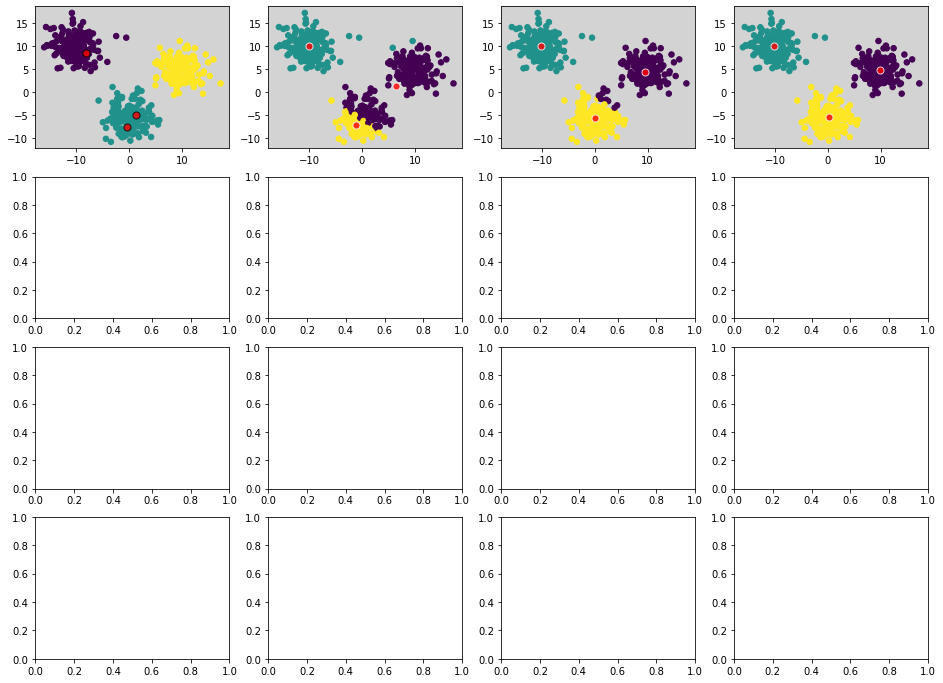

In [12]:
# 1. Randomly choose clusters
rng        = np.random.RandomState(2)
n_clusters = 3

indexes_for_centers   = rng.permutation(X.shape[0])[:n_clusters]
centers = X[indexes_for_centers]

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))

iteration = 0
ax[0][0].set_facecolor("lightgray")
ax[0][0].scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis')
ax[0][0].scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.8, edgecolor='k')

while True:
    
    # 2a. Assign labels based on closest center
    labels = pairwise_distances_argmin(X, centers)

    # 2b. Find new centers from means of points
    new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

    # 2c. Check for convergence
    
    if np.all(centers == new_centers) or iteration> 14:
        break
    
    iteration += 1
    rownum = int(iteration/4)
    colnum = iteration%4
    
    centers = new_centers
    
    ax[rownum][colnum].set_facecolor("lightgray")
    ax[rownum][colnum].scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
    ax[rownum][colnum].scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.8, edgecolor='w')